Média das distâncias iniciais: 0.6424177430405253
Stopping search: Swarm best objective change less than 1e-08
Média das distâncias otimizadas: 0.19294135486609584


c:\Users\leona\Desktop\GS-Dynamic\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


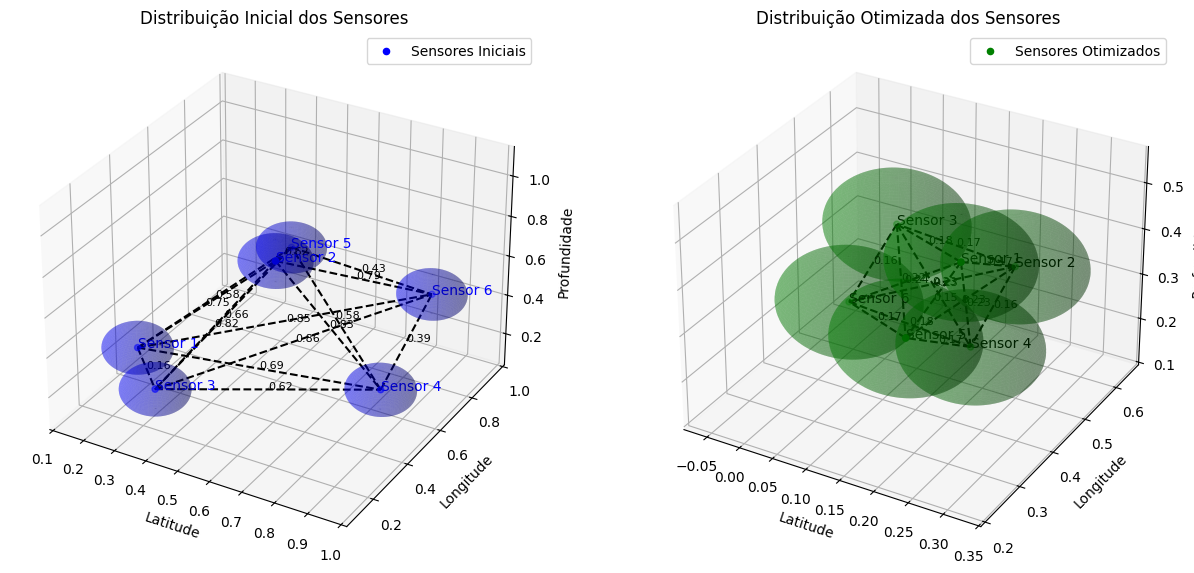

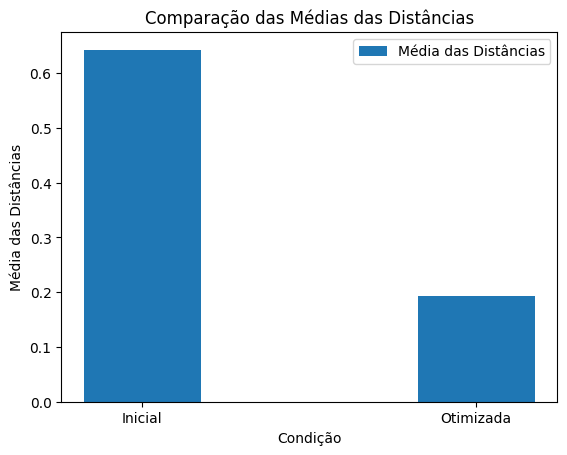

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Circle
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from pyswarm import pso

# Função para calcular a distância euclidiana entre todos os pares de sensores
def calcular_distancias(sensores):
    num_sensores = len(sensores)
    distancias = []
    for i in range(num_sensores):
        for j in range(i + 1, num_sensores):
            dist = np.sqrt(np.sum((sensores[i] - sensores[j])**2))
            distancias.append(dist)
    return distancias

# Gerar Latitude, longitude e profundidade de cada sensor
num_sensores = 6
sensores = np.random.rand(num_sensores, 3)

# Calcular distâncias antes da otimização
distancias_iniciais = calcular_distancias(sensores)
media_distancia_inicial = np.mean(distancias_iniciais)
print("Média das distâncias iniciais:", media_distancia_inicial)

# Plotar os pontos iniciais e os raios de cobertura
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(sensores[:,0], sensores[:,1], sensores[:,2], color='b', label='Sensores Iniciais')

# Função para plotar esferas ao redor dos pontos
def plot_spheres(ax, positions, radius, color):
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    for pos in positions:
        x = radius * np.outer(np.cos(u), np.sin(v)) + pos[0]
        y = radius * np.outer(np.sin(u), np.sin(v)) + pos[1]
        z = radius * np.outer(np.ones(np.size(u)), np.cos(v)) + pos[2]
        ax.plot_surface(x, y, z, color=color, alpha=0.3)

# Desenhar linhas conectando os pontos para visualizar as distâncias
for i in range(len(sensores)):
    for j in range(i + 1, len(sensores)):
        ax.plot([sensores[i,0], sensores[j,0]],
                [sensores[i,1], sensores[j,1]],
                [sensores[i,2], sensores[j,2]],
                'k--')
        dist = np.sqrt(np.sum((sensores[i] - sensores[j])**2))
        ax.text((sensores[i,0] + sensores[j,0]) / 2,
                (sensores[i,1] + sensores[j,1]) / 2,
                (sensores[i,2] + sensores[j,2]) / 2,
                f'{dist:.2f}', fontsize=8)

# Adicionar nomes aos sensores
for i in range(num_sensores):
    ax.text(sensores[i, 0], sensores[i, 1], sensores[i, 2], f'Sensor {i+1}', color='blue')

plot_spheres(ax, sensores, 0.1, 'b')

ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Profundidade')
ax.set_title('Distribuição Inicial dos Sensores')
ax.legend()

# Função objetivo para minimizar a distância média entre os sensores
def objective_function(positions):
    num_sensores = len(positions) // 3
    positions = positions.reshape((num_sensores, 3))
    ideal_distance = 0.2  # Defina a distância ideal entre os sensores
    distances = []
    penalties = []
    for i in range(num_sensores):
        for j in range(i + 1, num_sensores):
            dist = np.sqrt(np.sum((positions[i] - positions[j])**2))
            distances.append(dist)
            penalty = (dist - ideal_distance)**2
            penalties.append(penalty)
    return np.mean(penalties)

# Definindo limites para as coordenadas dos sensores (latitude, longitude, profundidade)
lower_bounds = [0, 0, 0] * num_sensores  # Mínimos valores para as coordenadas
upper_bounds = [1, 1, 1] * num_sensores  # Máximos valores para as coordenadas

# Executando a otimização por enxame de partículas
xopt, fopt = pso(objective_function, lower_bounds, upper_bounds, swarmsize=100, maxiter=200)

# Extraindo as posições ótimas dos sensores
optimal_positions = xopt.reshape((num_sensores, 3))

# Calcular distâncias após a otimização
distancias_otimizadas = calcular_distancias(optimal_positions)
media_distancia_otimizada = np.mean(distancias_otimizadas)
print("Média das distâncias otimizadas:", media_distancia_otimizada)

# Plotar os pontos otimizados e os raios de cobertura
ax = fig.add_subplot(122, projection='3d')
ax.scatter(optimal_positions[:, 0], optimal_positions[:, 1], optimal_positions[:, 2], color='g', label='Sensores Otimizados')

# Desenhar linhas conectando os pontos para visualizar as distâncias
for i in range(len(optimal_positions)):
    for j in range(i + 1, len(optimal_positions)):
        ax.plot([optimal_positions[i,0], optimal_positions[j,0]],
                [optimal_positions[i,1], optimal_positions[j,1]],
                [optimal_positions[i,2], optimal_positions[j,2]],
                'k--')
        dist = np.sqrt(np.sum((optimal_positions[i] - optimal_positions[j])**2))
        ax.text((optimal_positions[i,0] + optimal_positions[j,0]) / 2,
                (optimal_positions[i,1] + optimal_positions[j,1]) / 2,
                (optimal_positions[i,2] + optimal_positions[j,2]) / 2,
                f'{dist:.2f}', fontsize=8)

# Adicionar nomes aos sensores
for i in range(num_sensores):
    ax.text(optimal_positions[i, 0], optimal_positions[i, 1], optimal_positions[i, 2], f'Sensor {i+1}', color='black')

plot_spheres(ax, optimal_positions, 0.1, 'g')

ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Profundidade')
ax.set_title('Distribuição Otimizada dos Sensores')
ax.legend()

plt.show()

# Comparar as médias das distâncias
fig, ax = plt.subplots()
bar_width = 0.35
index = np.arange(2)
bar1 = plt.bar(index, [media_distancia_inicial, media_distancia_otimizada], bar_width, label='Média das Distâncias')
plt.xlabel('Condição')
plt.ylabel('Média das Distâncias')
plt.title('Comparação das Médias das Distâncias')
plt.xticks(index, ['Inicial', 'Otimizada'])
plt.legend()

plt.show()
